In [75]:
import math
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
from pylab import plt
plt.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')
import xlwt 
from xlwt import Workbook
import statistics
from scipy.stats import sem
from random import randint
from statistics import mean 
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [62]:
# Define two functions, d1 and d2 in Black-Scholes model
def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+0.5*sigma**2)*T)/sigma*np.sqrt(T)
def d2(S,K,T,r,sigma):
    return (np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))

In [63]:
# Define pdf of d2 
def d2_pdf(S,K,T,r,sigma):
#    S = float(S)
    pi = math.pi
#    d2pdf = (1/np.sqrt(2*pi)) * np.exp(-0.5*(d2(S,E,T,r,sigma))**2)
    d2pdf = norm.pdf(d2(S,K,T,r,sigma))
    return d2pdf

In [64]:
# A function of binary option on both put and call.
def option(S,K,T,r,sigma,Type):
    
    if Type == "Call":
        payoff = S * norm.cdf(d1(S,K,T,r,sigma)) - norm.cdf(d2(S,K,T,r,sigma))* K * np.exp(-r*T) 
    elif Type == "Put":
        payoff = norm.cdf(-d2(S,K,T,r,sigma)) * K * np.exp(-r*T) - S * norm.cdf(-d1(S,K,T,r,sigma))

    return payoff

In [65]:
# Initial sample data:
S = 100
K = 100
T = 1
sigma = 0.3
r = 0.02
Type = 'Call'

# Initial price of the binary call option  
Bc_0 = option(S, K, T, r, sigma, Type)
Bc_0

12.82158139269142

In [66]:
# Initial price of the binary call option  
Bp_0 = option(S, K, T, r, sigma, "Put")
Bp_0

10.841448723366945

In [68]:
# Define the greeks for sensitivity of the option

# Change of option price on a unit change in the underlying stock
def delta(S,K,T,r,sigma,Type):
    
    if Type == "Call":
        delta = norm.cdf(d1(S,K,T,r,sigma))
    elif Type == "Put":
        delta = -norm.cdf(-d1(S,K,T,r,sigma))

    return delta

# Sensitivity of the option with respect to time
def theta(S,K,T,r,sigma,Type):
    
    if Type == "Call":
        theta = -S*sigma* (norm.pdf(d1(S,K,T,r,sigma)))/(2*np.sqrt(T)) - r*K*np.exp(-r*T)* (norm.cdf(d2(S,K,T,r,sigma)))
    elif Type == "Put":
        theta = -S*sigma* (norm.pdf(d1(S,K,T,r,sigma)))/(2*np.sqrt(T)) - r*K*np.exp(-r*T)* (norm.cdf(-d2(S,K,T,r,sigma)))

    return theta

# Rate of change of Delta, or the second order differentiation of the option price on the underlying
def gamma(S,K,T,r,sigma,Type):

    if Type == "Call":
        gamma = norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*np.sqrt(T))
    elif Type == "Put":
        gamma = norm.pdf(d1(S,K,T,r,sigma))/(S*sigma*np.sqrt(T))

    return gamma

# Options sensitivity to volatility
def vega(S,K,T,r,sigma,Type):
    
    if Type=="Call":
        vega = S*norm.pdf(d1(S,K,T,r,sigma))*np.sqrt(T)
    elif Type=="Put":
        vega = S* norm.pdf(d1(S,K,T,r,sigma))*np.sqrt(T)
        
    return vega

# Option's price change per unit change in the interest rate
def rho(S,K,T,r,sigma,Type):
    
    if Type=="Call":
        rho = K*T*(np.exp(-r*T))*norm.cdf(d2(S,K,T,r,sigma))
    elif Type=="Put":
        rho = -K*T*np.exp(-r*T)*norm.cdf(-d2(S,K,T,r,sigma))
    
    return rho
    
# Source: https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/

In [71]:
# Q&A: input the current stock price and check if it is a number.
S = input("What is the current stock price? ");
while True:
    try:
        S = float(S)
        break
    except:
        print("The current stock price has to be a NUMBER.")
        S = input("What is the current stock price? ")

## input the strike price and check if it is a number.
K = input("What is the strike price? ");
while True:
    try:
        K = float(K)
        break
    except:
        print("The the strike price has to be a NUMBER.")
        K = input("What is the strike price? ")


## input the expiration_date and calculate the days between today and the expiration date.
while True:
    expiration_date = input("What is the expiration date of the options? (mm-dd-yyyy) ")
    try:
        expiration_date = datetime.strptime(expiration_date, "%m-%d-%Y")
    except ValueError as e:
        print("error: %s\nTry again." % (e,))
    else:
        break
T = float(f'{(expiration_date - datetime.utcnow()).days / 365:,.02f}')      # modified from code source


## input the continuously compounding risk-free interest rate and check if it is a number.
r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ");
while True:
    try:
        r = float(r)
        break
    except:
        print("The continuously compounding risk-free interest rate has to be a NUMBER.")
        r = input("What is the continuously compounding risk-free interest rate in percentage(%)? ")
        

## input the volatility and check if it is a number.
sigma = input("What is the volatility in percentage(%)? "); 
while True:
    try:
        sigma = float(sigma)
        if sigma > 1 or sigma < 0:                                   # modified from code source
            print ( "The range of sigma has to be beween 0 and 1.")
            sigma = input("What is the volatility in percentage(%)? ")
        break
    except:
        print("The volatility has to be a NUMBER.")
        sigma = input("What is the volatility in percentage(%)? ")

# Source: https://github.com/YuChenAmberLu/Options-Calculator/blob/master/Options%20Calculator%20with%20Black%20Scholes%20model.ipynb

What is the current stock price?  100
What is the strike price?  100
What is the expiration date of the options? (mm-dd-yyyy)  04-17-2021
What is the continuously compounding risk-free interest rate in percentage(%)?  0.03
What is the volatility in percentage(%)?  0.2


In [72]:
## make a DataFrame of these inputs
data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,100.00
Strike price,K,100.00
Time to maturity,T,1.00
Risk-free interest rate,r,0.03
Volatility,sigma,0.20


In [73]:
## Based on Black-Scholes Pricing: calculate the call / put option price and the greeks of the call / put option
price_and_greeks = {'Call' : [option(S,K,T,r,sigma,'Call'), delta(S,K,T,r,sigma,'Call'), theta(S,K,T,r,sigma,'Call'), gamma(S,K,T,r,sigma,'Call'), vega(S,K,T,r,sigma,'Call'), rho(S,K,T,r,sigma,'Call')],
                    'Put' : [option(S,K,T,r,sigma,'Put'), delta(S,K,T,r,sigma,'Put'), theta(S,K,T,r,sigma,'Put'), gamma(S,K,T,r,sigma,'Put'), vega(S,K,T,r,sigma,'Put'), rho(S,K,T,r,sigma,'Put')]}
price_and_greeks_frame = DataFrame(price_and_greeks, columns=['Call','Put'], index=['Price', 'delta', 'theta', 'gamma', 'vega', 'rho'])
price_and_greeks_frame

,Call,Put
Price,9.413403,6.457957
delta,0.598706,-0.401294
theta,-5.380398,-5.264301
gamma,0.019333,0.019333
vega,38.666812,38.666812
rho,50.457229,-46.587324


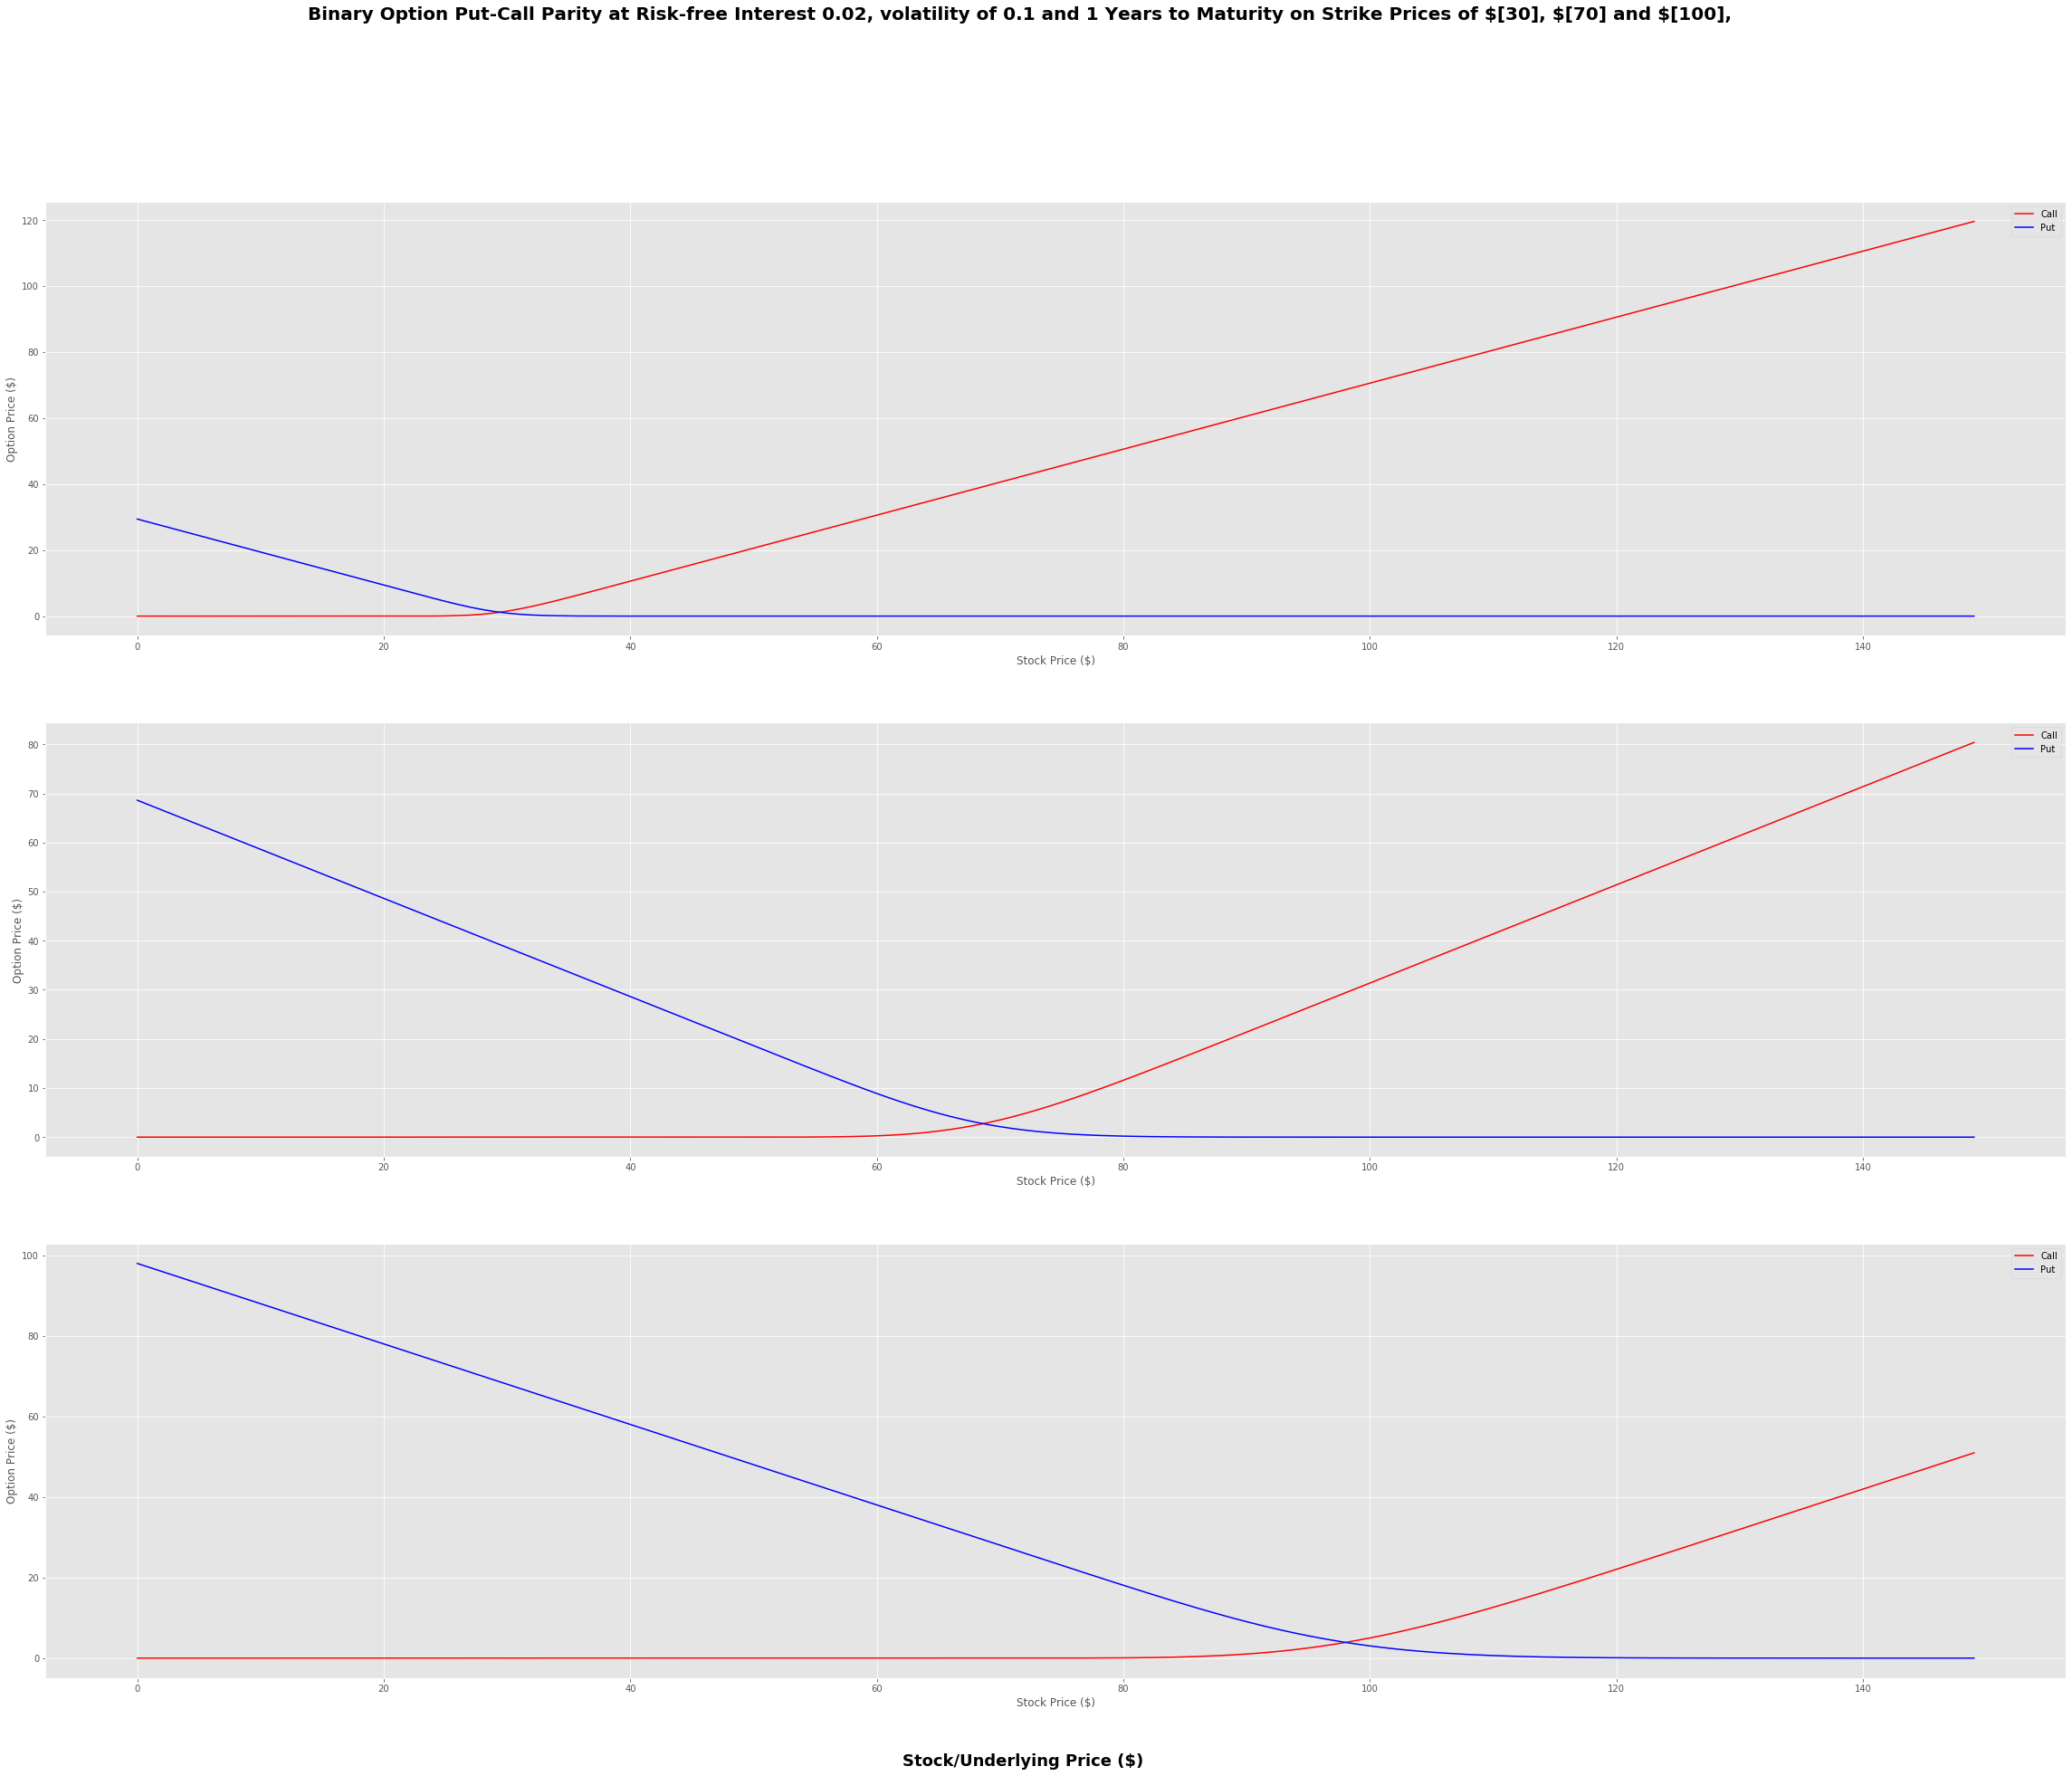

In [76]:
K1 = [30]          # strike price, E, of $100
K2 = [70]     # strike price, E, of $20 and $50
K3 = [100] #strike price, E, of $20 $50, and $100


fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(40, 30))
fig.suptitle(f'Binary Option Put-Call Parity at Risk-free Interest {r}, volatility of {sigma} and {T} Years to Maturity on Strike Prices of ${K1}, ${K2} and ${K3}, ', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')


r = 0.02
sigma = 0.1
T = 1
s = np.arange(0,150)

plt.subplot(311)
for i in K1:
    vals_call = [option(S,K1,T,r,sigma, "Call") for S in s]
    vals_put = [option(S,K1,T,r,sigma, 'Put') for S in s]

    vals_call = np.array(vals_call).reshape(-1,1)
    vals_put = np.array(vals_put).reshape(-1,1)

    s = np.array(s).reshape(-1,1)

    plt.plot(s,vals_call, 'r', label = "Call")
    plt.plot(s, vals_put, 'b', label  = "Put")

    plt.xlabel("Stock Price ($)")
    plt.ylabel("Option Price ($)")

    plt.legend(loc='upper right')

plt.subplot(312)
for i in K2:

    vals_call = [option(S,K2,T,r,sigma, 'Call') for S in s]
    vals_put = [option(S,K2,T,r,sigma, 'Put') for S in s]

    vals_call = np.array(vals_call).reshape(-1,1)
    vals_put = np.array(vals_put).reshape(-1,1)

    s = np.array(s).reshape(-1,1)

    plt.plot(s,vals_call, 'r', label = "Call")
    plt.plot(s, vals_put, 'b', label  = "Put")

    plt.xlabel("Stock Price ($)")
    plt.ylabel("Option Price ($)")

    plt.legend(loc='upper right')

plt.subplot(313)
for i in K3:

    vals_call = [option(S,K3,T,r,sigma, 'Call') for S in s]
    vals_put = [option(S,K3,T,r,sigma, 'Put') for S in s]

    vals_call = np.array(vals_call).reshape(-1,1)
    vals_put = np.array(vals_put).reshape(-1,1)

    s = np.array(s).reshape(-1,1)

    plt.plot(s, vals_call, 'r', label = "Call")
    plt.plot(s, vals_put, 'b', label  = "Put")

    plt.xlabel("Stock Price ($)")
    plt.ylabel("Option Price ($)")

    plt.legend(loc='upper right')

plt.savefig(f'../Images/put_call_parity.png')

plt.show()

# Source: https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/

# References:

* Source: https://github.com/YuChenAmberLu/Options-Calculator/blob/master/Options%20Calculator%20with%20Black%20Scholes%20model.ipynb
* https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/